In [9]:
!pip3 install torch

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [11]:
#Create the training data
no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
area = [3400,4500,6500,7700,6600,3500,4300,3700,8700,9000,9100,9200,8200,8800,8400,8300,7900,7400,7100,6400]
price = [1500,2300,2777,3567,2799,1633,2111,1700,4333,4500,4551,4560,4200,4304,4000,4230,3700,3300,3000,2600]
data = pd.DataFrame({'No':no,'Area':area,'Price':price})

data.head()

,No,Area,Price
0,1,3400,1500
1,2,4500,2300
2,3,6500,2777
3,4,7700,3567
4,5,6600,2799


In [12]:
#create the test data
index = [1,2,3]
area_size = [1200, 1350, 5400]
area_value = [571, 643, 2570]
test_data = pd.DataFrame({'No':index, 'Area': area_size, 'Expected Value': area_value})

test_data.head()

,No,Area,Expected Value
0,1,1200,571
1,2,1350,643
2,3,5400,2570


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

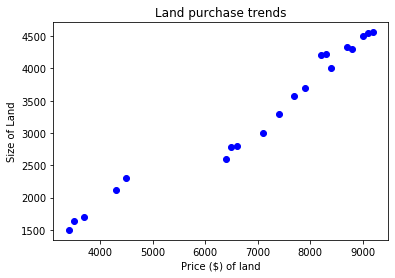

In [13]:
#convert the data into a numpy array
data = np.array(data,dtype=np.float32)
x_train = data[: ,1:2]
y_train = data[: ,2:3]

test_data = np.array(test_data,dtype=np.float32)
x_test = test_data[:,1:2]
y_test = test_data[:, 2:3]

#visualize the data using a scatter plot
plt.plot(x_train, y_train, 'bo')
plt.xlabel("Price ($) of land")
plt.ylabel("Size of Land")
plt.title("Land purchase trends")
plt

In [0]:
class LinReg(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinReg, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
#define input/output dimensions, learning rate and the no. of epochs to run
input_dimension = 1        
output_dimension = 1
learn_rate =0.000000001 
epochs = 100

model = LinReg(input_dimension, output_dimension)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [0]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

epoch 0, loss 12977309.0
epoch 10, loss 1494340.125
epoch 20, loss 211986.53125
epoch 30, loss 68780.484375
epoch 40, loss 52788.125
epoch 50, loss 51002.1953125
epoch 60, loss 50802.765625
epoch 70, loss 50780.47265625
epoch 80, loss 50777.9921875
epoch 90, loss 50777.71875


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

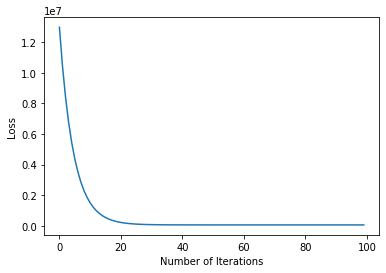

In [17]:
losses=[]
for epoch in range(epochs):
    # Convert the inputs and labels to Variables
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers in order to avoid cumulation of gradients
    optimizer.zero_grad()

    # get output from the model
    outputs = model(inputs)

    # get the loss for the predicted output
    loss = criterion(outputs, labels)
    # get the gradients
    loss.backward()
    # update parameters
    optimizer.step()
    losses.append(loss.data)
    if(epoch%10==0):
        print('epoch {}, loss {}'.format(epoch, loss.data))
plt.plot(range(epochs),losses)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt

predicted= [[1620.4072]
 [2144.5337]
 [3097.491 ]
 [3669.2651]
 [3145.1387]
 [1668.055 ]
 [2049.238 ]
 [1763.3508]
 [4145.7437]
 [4288.6875]
 [4336.3354]
 [4383.983 ]
 [3907.5046]
 [4193.3916]
 [4002.8003]
 [3955.1523]
 [3764.561 ]
 [3526.3215]
 [3383.3782]
 [3049.843 ]]


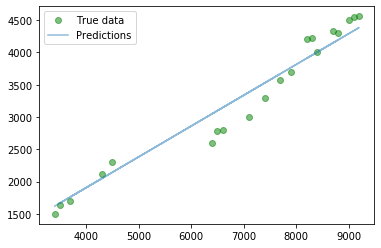

In [18]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print("predicted=",predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '-', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

predicted= [[ 572.1543]
 [ 643.6261]
 [2573.3645]]


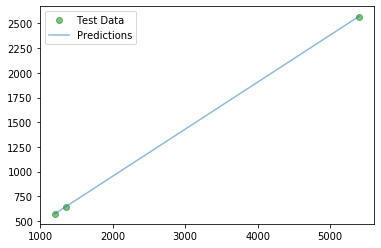

In [19]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_test).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_test))).data.numpy()
    print("predicted=",predicted)

plt.clf()
plt.plot(x_test, y_test, 'go', label='Test Data', alpha=0.5)
plt.plot(x_test, predicted, '-', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()